# Principios de analisis de clusters

## Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Establecer el estilo de seaborn
sns.set()
# importamos KMeansns de sklearn para hacer el agrupamiento
from sklearn.cluster import KMeans

## Load the data

In [2]:
# Load the country clusters data
data = pd.read_csv('Country clusters.csv')

In [3]:
# miramos los datos
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Graficamos los datos

<function matplotlib.pyplot.show(close=None, block=None)>

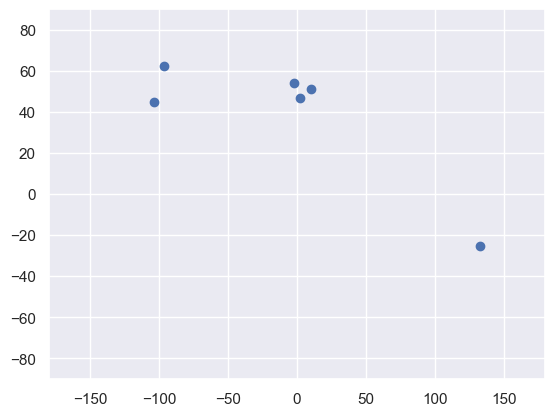

In [4]:
# creamos grafico de dispersion en base a latitud y longitud
# longitude as y, and the latitude as x
plt.scatter(data['Longitude'],data['Latitude'])
# establecemos limites de los ejes
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Seleccionamos las carecteristicas

In [5]:
# iloc rebana la hoja de datos, dadas las filas y las columnas que se mantendran
x = data.iloc[:,1:3]#el primer argumento lke indica que queremos mantener todas las filas 
#1:3 nos da las columnas 1 y 2 por los indices de python

In [6]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [7]:
# creamos la variable kmedia
kmeans = KMeans(3)#recibe el numero de agrupamientos que queremos producir

In [8]:
# kmedia se llena en base al metodo fit
kmeans.fit(x)

C:\Users\anton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

## Clustering results

Obtendremos los agrupamientos predichos para cada prediccion

In [9]:
# la siguiente variable contendra clusters de cada observacion
identified_clusters = kmeans.fit_predict(x)
# revisamos resultados
identified_clusters

C:\Users\anton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 2, 2, 2, 0])

In [10]:
# el resultado anterior es una matriz que contiene los agrupamientos previstos
#creamos una hoja de datos para ver las cosas mas claro
data_with_clusters = data.copy()
# y una variable con los grupos identificados
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,0


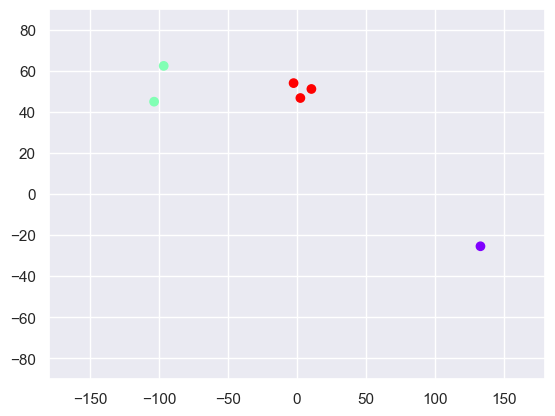

In [11]:
# graficamos los resultados y coloreamos en base a sus grupos
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()
#podemos cambiar el numero de grupos regresando a la variable de kmeans y reiniciando el kernel